## 랜덤 포레스트

In [8]:
import pandas as pd
df=pd.read_csv('cabbage_merge.csv',encoding='cp949')

In [9]:
df.head(1)

,일시,품목,품종,광역산지,일별 도매가격(원/kg) 평균,일별 거래금액(백만원) 평균,일별 거래량(톤) 합,고랭지배추:면적 (ha),10a당 생산량 (kg),생산량 (톤),2달 평균기온(°C),2달 평균최저기온(°C),2달 평균최고기온(°C),일강수량(mm),2달 평균 풍속(m/s),2달 평균 상대습도(%),2달 평균 합계일조시간(hr),연도,월,일
0,2014-07-08,배추,고냉지배추,강원,500.0,0.19,0.38,4579,3525,161410,21.181967,17.434426,25.086885,1.477049,1.960656,64.878689,5.842623,2014,7,8


In [10]:
df = df.set_index('일시')

In [11]:
df.columns

Index(['품목', '품종', '광역산지', '일별 도매가격(원/kg) 평균', '일별 거래금액(백만원) 평균',
       '일별 거래량(톤) 합', '고랭지배추:면적 (ha)', '10a당 생산량 (kg)', '생산량 (톤)',
       '2달 평균기온(°C)', '2달 평균최저기온(°C)', '2달 평균최고기온(°C)', '일강수량(mm)',
       '2달 평균 풍속(m/s)', '2달 평균 상대습도(%)', '2달 평균 합계일조시간(hr)', '연도', '월', '일'],
      dtype='object')

In [12]:
df.head()

,품목,품종,광역산지,일별 도매가격(원/kg) 평균,일별 거래금액(백만원) 평균,일별 거래량(톤) 합,고랭지배추:면적 (ha),10a당 생산량 (kg),생산량 (톤),2달 평균기온(°C),2달 평균최저기온(°C),2달 평균최고기온(°C),일강수량(mm),2달 평균 풍속(m/s),2달 평균 상대습도(%),2달 평균 합계일조시간(hr),연도,월,일
일시,,,,,,,,,,,,,,,,,,,
2014-07-08,배추,고냉지배추,강원,500.000000,0.190000,0.38,4579,3525,161410,21.181967,17.434426,25.086885,1.477049,1.960656,64.878689,5.842623,2014,7,8
2014-07-09,배추,고냉지배추,강원,581.000000,0.190000,0.32,4579,3525,161410,21.381967,17.663934,25.318033,1.927869,1.952459,65.352459,5.714754,2014,7,9
2014-07-10,배추,고냉지배추,강원,624.000000,0.320000,0.51,4579,3525,161410,21.537705,17.901639,25.411475,1.927869,1.949180,65.834426,5.606557,2014,7,10
2014-07-24,배추,고냉지배추,강원,828.666667,5.113333,19.30,4579,3525,161410,23.577049,20.121311,27.290164,2.309836,1.988525,65.408197,5.724590,2014,7,24
2014-07-25,배추,고냉지배추,강원,736.000000,6.990000,9.50,4579,3525,161410,23.575410,20.149180,27.336066,2.480328,1.972131,66.034426,5.709836,2014,7,25


In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

style.use('seaborn-talk')

krfont = {'family':'NanumGothic','weight':'bold','size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus']=False

x = df[['고랭지배추:면적 (ha)', '10a당 생산량 (kg)', '생산량 (톤)',
       '2달 평균기온(°C)', '2달 평균최저기온(°C)', '2달 평균최고기온(°C)', '일강수량(mm)',
       '2달 평균 풍속(m/s)', '2달 평균 상대습도(%)', '2달 평균 합계일조시간(hr)']].values
y = df['일별 도매가격(원/kg) 평균']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)


In [14]:
x

array([[4.57900000e+03, 3.52500000e+03, 1.61410000e+05, ...,
        1.96065574e+00, 6.48786885e+01, 5.84262295e+00],
       [4.57900000e+03, 3.52500000e+03, 1.61410000e+05, ...,
        1.95245902e+00, 6.53524590e+01, 5.71475410e+00],
       [4.57900000e+03, 3.52500000e+03, 1.61410000e+05, ...,
        1.94918033e+00, 6.58344262e+01, 5.60655738e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.33606557e+00, 5.87819672e+01, 6.36229508e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.38196721e+00, 5.87622951e+01, 6.34918033e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.38524590e+00, 5.71590164e+01, 6.30983607e+00]])

In [15]:
y

일시
2014-07-08    500.000000
2014-07-09    581.000000
2014-07-10    624.000000
2014-07-24    828.666667
2014-07-25    736.000000
                 ...    
2020-11-16    443.000000
2020-11-18    630.000000
2020-11-19    550.000000
2020-11-20    510.000000
2020-11-24    775.000000
Name: 일별 도매가격(원/kg) 평균, Length: 665, dtype: float64

In [16]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

465
200
465
200


In [17]:

# MinMaxScaler을 통한 스케일링
scaler = MinMaxScaler()
# X scaler 생성
x = scaler.fit_transform(x)
# Y scaler 생성
yscaler = scaler.fit(y.values.reshape(-1,1))

# 스케일링 적용
#X = Xscaler.transform(X)
y = yscaler.transform(y.values.reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

In [18]:
forest = RandomForestRegressor(n_estimators=2000,criterion='mse',random_state=1,n_jobs=-1)
forest.fit(x_train,y_train)
y_train_pred = forest.predict(x_train)
y_test_pred = forest.predict(x_test)

r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)

print('훈련 R^2: %.3f, 테스트 R^2: %.3f'%(r2_train,r2_test))

<ipython-input-18-665102de5d18>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train,y_train)


훈련 R^2: 0.835, 테스트 R^2: -0.120


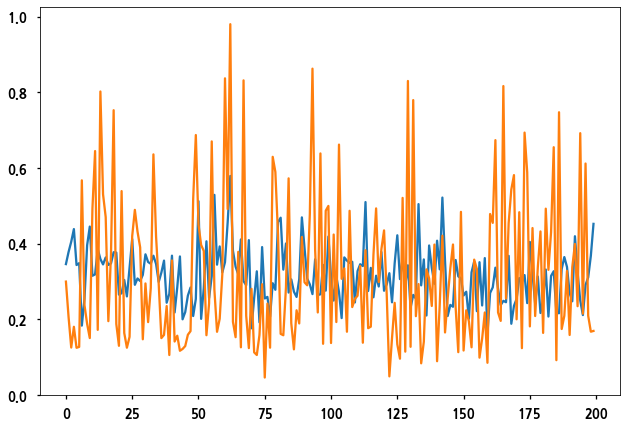

In [19]:
plt.plot(y_test_pred)
plt.plot(y_test)
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_train_pred)
mse = mean_squared_error(y_test, y_test_pred)

print(train_mse, mse)

0.0056276758057813205 0.04340037464311315
